<a href="https://colab.research.google.com/github/sanjainatesan/Calculator-app-level-1/blob/main/OBJECT_DETECTION_MODEL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving news4.jpg to news4 (1).jpg


Loading weights:   0%|          | 0/530 [00:00<?, ?it/s]

Error during conversion: AttributeError("'str' object has no attribute 'decode'")
Exception in thread Thread-auto_conversion:
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.12/threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.12/dist-packages/transformers/safetensors_conversion.py", line 116, in auto_conversion
    raise e
  File "/usr/local/lib/python3.12/dist-packages/transformers/safetensors_conversion.py", line 95, in auto_conversion
    sha = get_conversion_pr_reference(api, pretrained_model_name_or_path, **cached_file_kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/transformers/safetensors_conversion.py", line 76, in get_conversion_pr_reference
    raise OSError(
OSError: Could not create safetensors conversion PR. The

Detected objects with confidence scores and bounding boxes:
Detected person with confidence 95.9% at location [828.75, 258.82, 930.59, 312.54]
Detected bottle with confidence 97.13% at location [611.38, 610.42, 632.07, 650.51]
Detected bottle with confidence 91.98% at location [537.15, 632.62, 562.19, 662.02]
Detected tie with confidence 99.32% at location [538.25, 588.51, 555.86, 634.05]
Detected bottle with confidence 91.77% at location [367.31, 639.4, 394.38, 674.92]
Detected tie with confidence 96.12% at location [577.5, 588.55, 603.91, 631.06]
Detected person with confidence 99.88% at location [338.53, 533.27, 479.05, 663.51]
Detected person with confidence 99.85% at location [451.26, 517.49, 644.56, 649.83]
Detected person with confidence 90.42% at location [797.72, 197.74, 987.87, 308.17]


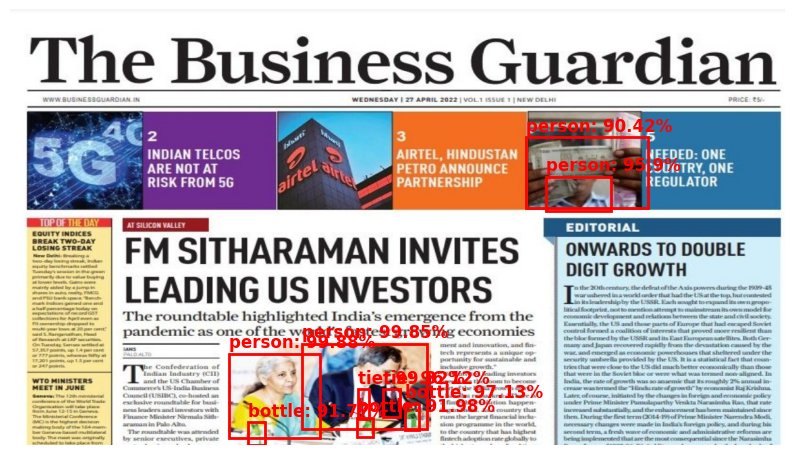

In [ ]:
import torch
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Upload an image from local machine
uploaded = files.upload()

# Get the uploaded image file name
image_path = next(iter(uploaded))

# Load the image using PIL
image = Image.open(image_path)

# Load the processor and model (no timm dependency)
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Perform inference
outputs = model(**inputs)

# Post-process the outputs (keep only detections with score > 0.9)
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# Display the detected objects with scores and bounding boxes
print("Detected objects with confidence scores and bounding boxes:")
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item() * 100, 2)}% at location {box}"
    )

# Display the image with bounding boxes and labels
plt.figure(figsize=(10, 10))
plt.imshow(image)
ax = plt.gca()

# Draw bounding boxes with labels
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    # Convert the box to a format that can be used by Matplotlib
    box = [round(i, 2) for i in box.tolist()]
    x, y, width, height = box[0], box[1], box[2] - box[0], box[3] - box[1]

    # Create a rectangle patch
    rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    # Label the box
    label_text = f"{model.config.id2label[label.item()]}: {round(score.item() * 100, 2)}%"
    plt.text(x, y - 10, label_text, color='red', fontsize=12, weight='bold')

plt.axis("off")
plt.show()
